# HR_Analytics Project

    Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

## HR Analytics

    Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

## Attrition in HR

    Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees

## How does Attrition affect companies?

    A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('HR_Analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Problem:
        - To study the factors that lead to employee attrition.
### Task:
        - Classification.

# EDA

In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

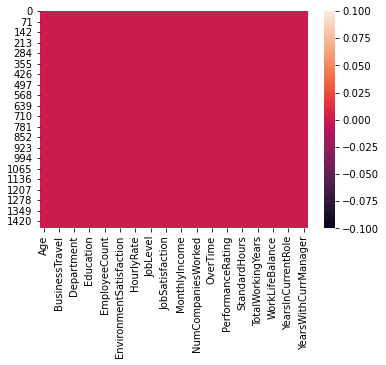

In [6]:
sns.heatmap(df.isnull())
plt.show()

### Observations:
        No missing values in the dataset.

## Univariate Analysis

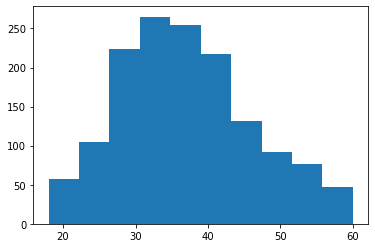

In [7]:
plt.hist(df['Age'])
plt.show()

### Observations:
        Majority of employees age is in between 25 to 45 years.

In [8]:
# Label Column
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

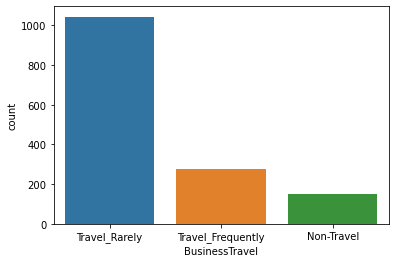

In [10]:
sns.countplot(df['BusinessTravel'])
plt.show()

### Observations:
        Majority of employees travel rarely.

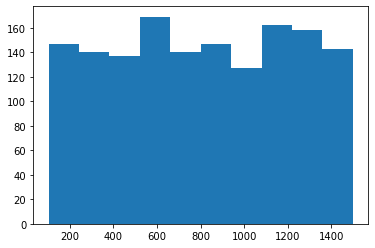

In [11]:
plt.hist(df['DailyRate'])
plt.show()

### Observations
        The amount of money employees get per day(Daily Rate) ranges from 150 to 1500 units.

In [12]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

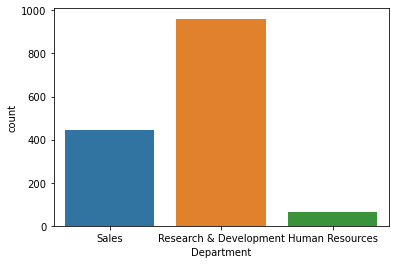

In [13]:
sns.countplot(df['Department'])
plt.show()

### Observations:
        Majority of employees are working in R & D department.

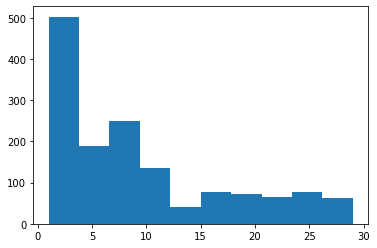

In [14]:
plt.hist(df['DistanceFromHome'])
plt.show()

### Observations:
        Majority of employees cover less distance everyday to reach there workplace.

In [15]:
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

### Observations:
        Education Scale: 1 to 5

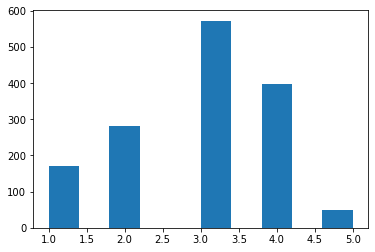

In [16]:
plt.hist(df['Education'])
plt.show()

### Observations:
        Majority of employees education is in the range of 3 to 4 on education scale.

In [17]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

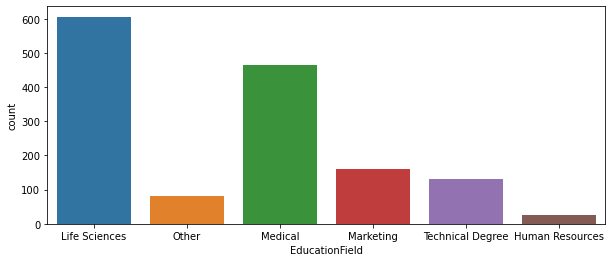

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df['EducationField'])
plt.show()

### Observations:
        Educational Field of majority of employees are in Life Sciences and Medical. 

In [19]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

### Observations:
        -Unnecessary Column
        -Let's drop this column

In [20]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [21]:
df.drop('EmployeeNumber',axis=1,inplace=True)

### Reason:
    EmployeeNumber column's values are unique to each employee and it is not required for attrition prediction, hence we can drop this column.

In [22]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

### Observations:
        Environment_Satisfaction Scale: 1 to 5

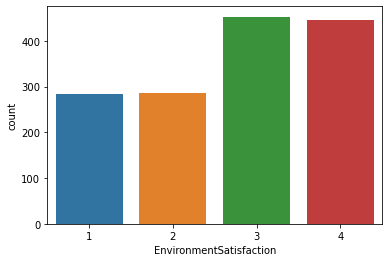

In [23]:
sns.countplot(df['EnvironmentSatisfaction'])
plt.show()

### Observations:
        Environment Satisfaction of majority of employees is in the range of 3 to 4 on Environment_Satisfaction scale.

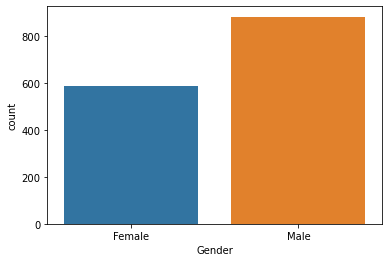

In [24]:
sns.countplot(df['Gender'])
plt.show()

### Observations:
        Majority of employees are Male.
        - No. of Male Employees: 882
        - No. of Female Employees: 558

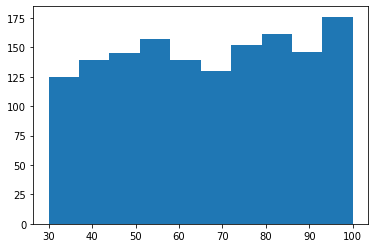

In [25]:
plt.hist(df['HourlyRate'])
plt.show()

### Observations:
        Employees Hourly Rate is in the range of 30 to 100 units.

In [26]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

### Observations:
        Job_Involvement Scale: 1 to 5

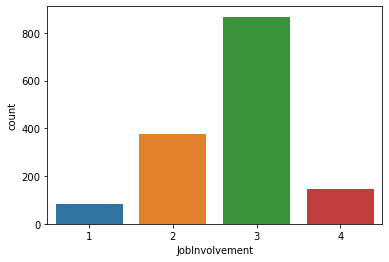

In [27]:
sns.countplot(df['JobInvolvement'])
plt.show()

### Observations:
        Job Involvement of majority of employees is 3 on the Job_Involvement scale.

In [28]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

### Observations:
        Job_Level Scale: 1 to 5

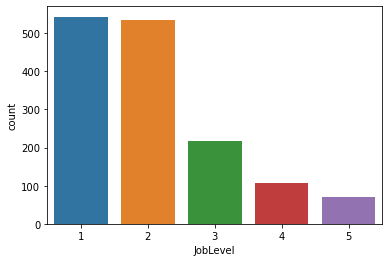

In [29]:
sns.countplot(df['JobLevel'])
plt.show()

### Observations:
        Job Level of majority of employees are in the range of 1 to 2 on Job_Level scale.

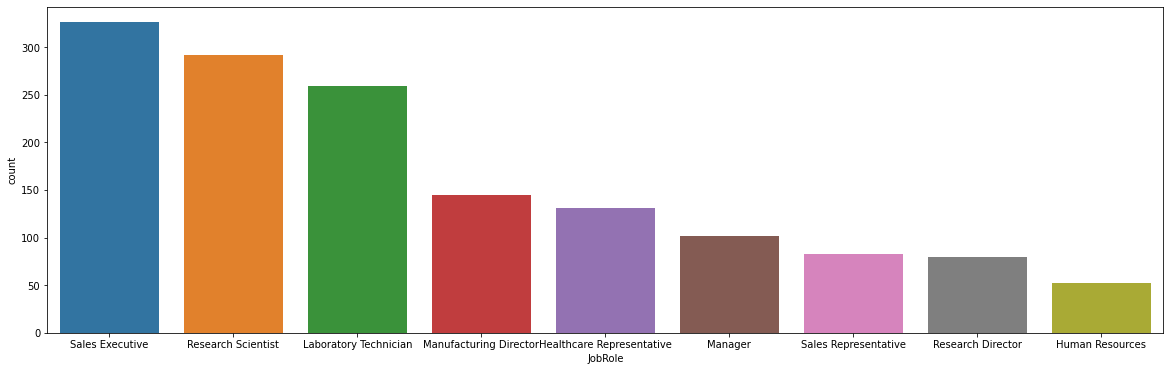

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(df['JobRole'])
plt.show()

### Observations:
        Majority of employees are working as Sales Executives, Research Scientists and Laboratory Technicians.

In [31]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

### Observations:
        Job_Satisfaction Scale: 1 to 5

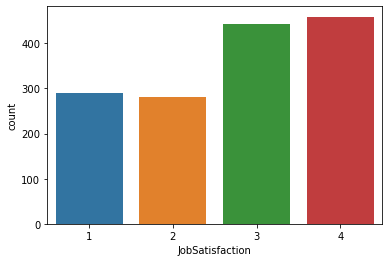

In [32]:
sns.countplot(df['JobSatisfaction'])
plt.show()

### Observations:
        Job Satisfaction of majority of employees are in the range of 3 to 4 on Job_Satisfaction scale.

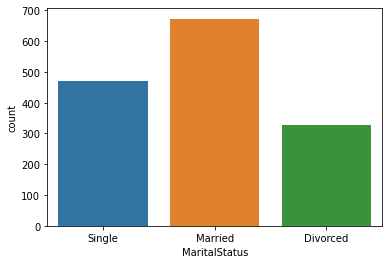

In [33]:
sns.countplot(df['MaritalStatus'])
plt.show()

### Observations:
        Majority of employees are married.

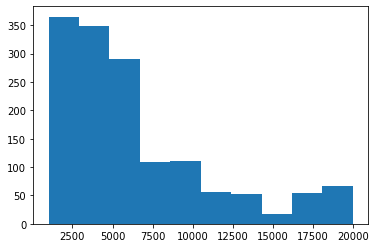

In [34]:
plt.hist(df['MonthlyIncome'])
plt.show()

### Observations:
        Employees Monthly Income is in the range of 2500 to 20000 units.

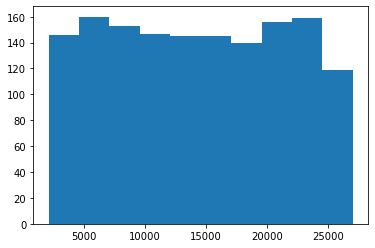

In [35]:
plt.hist(df['MonthlyRate'])
plt.show()

### Observations:
        Employees Monthly Rate is in the range of 2000 to 25000 units.

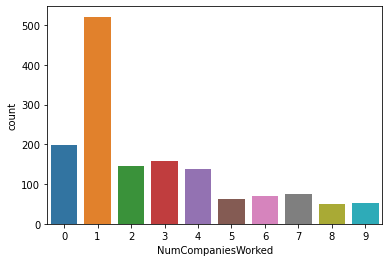

In [36]:
sns.countplot(df['NumCompaniesWorked'])
plt.show()

### Observations:
        Majority of employees have worked in many companies which ranges from 1 to 9 companies.

In [37]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [38]:
df.drop('Over18',axis=1,inplace=True)

### Reason:
        Since all employees are over 18 years of age and also this factor has no impact on employees attrition, hence we can drop this column.

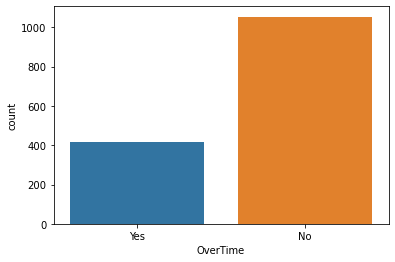

In [39]:
sns.countplot(df['OverTime'])
plt.show()

### Observations:
        Majority of employees won't work over-time.

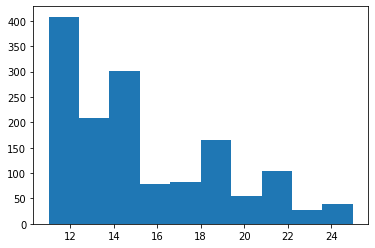

In [40]:
plt.hist(df['PercentSalaryHike'])
plt.show()

### Observations:
        Percent Salary Hike ranges from 11% to 25%.

In [41]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

### Observations:
        Performance Rating Scale: 1 to 5.

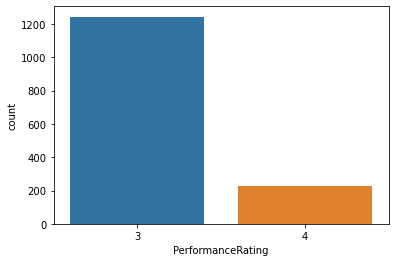

In [42]:
sns.countplot(df['PerformanceRating'])
plt.show()

### Observations:
        Performance Rating of majority of employees is 3 on Performance_Rating scale.

In [43]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

### Observations:
        Relationship_Satisfaction Scale: 1 to 5.

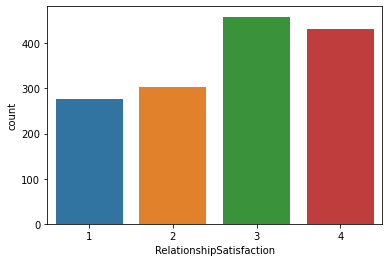

In [44]:
sns.countplot(df['RelationshipSatisfaction'])
plt.show()

### Observations:
        Relationship Satisfaction of majority of employees is in the range 2 to 4 on Relationship_Satisfaction scale.

In [45]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [46]:
df.drop('StandardHours',axis=1,inplace=True)

### Reason:
        -Standard Hours of working is same for all employees.
        -Hence this factor has no influence on employees attrition. 

In [47]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

### Observations:
        Stock_Option_Level Scale: 0 To 5

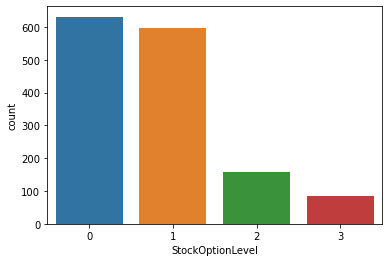

In [48]:
sns.countplot(df['StockOptionLevel'])
plt.show()

### Observations:
        Employees Stock Option Level ranges from 0 to 3 on Stock_Option_Level scale.

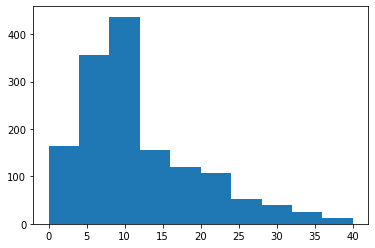

In [49]:
plt.hist(df['TotalWorkingYears'])
plt.show()

### Observations:
        Work experience of employees is in the range of 0 to 40 years.

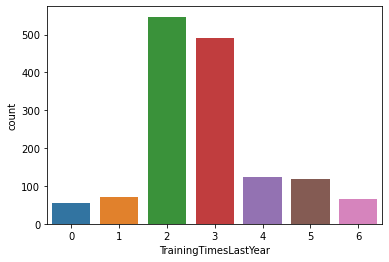

In [50]:
sns.countplot(df['TrainingTimesLastYear'])
plt.show()

### Observations:
        Majority of employees are trained 2 to 3 times last year.

In [51]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

### Observations:
        Work_Life_Balance Scale: 1 to 5

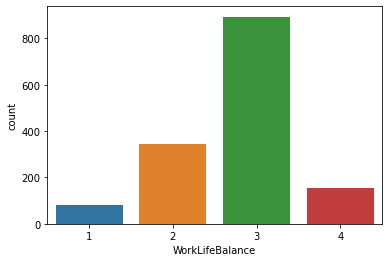

In [52]:
sns.countplot(df['WorkLifeBalance'])
plt.show()

### Observations:
        Work Life Balance of majority of employees are in range of 2 to 3 on Work_Life_Balance scale.

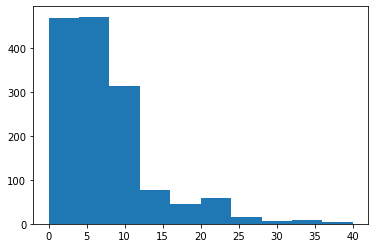

In [53]:
plt.hist(df['YearsAtCompany'])
plt.show()

### Observations:
        Employees working years at this company ranges from 0 to 40 years.

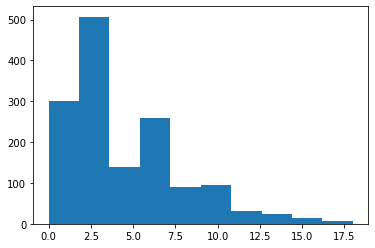

In [54]:
plt.hist(df['YearsInCurrentRole'])
plt.show()

### Observations:
        Employees Years In Current Role ranges from 0 to 17.5 years.

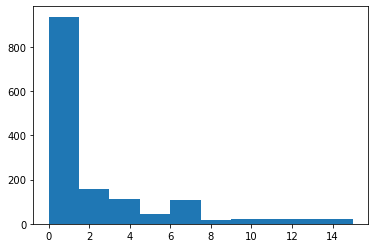

In [55]:
plt.hist(df['YearsSinceLastPromotion'])
plt.show()

### Observations:
        Employees Years Since Last Promotion ranges from 0 to 15 years.

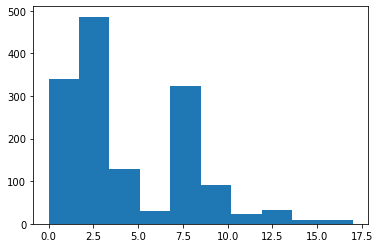

In [56]:
plt.hist(df['YearsWithCurrManager'])
plt.show()

### Observations:
        Employees Years With Current Manager ranges from 0 to 16.5 years.

## Bivariate Analysis

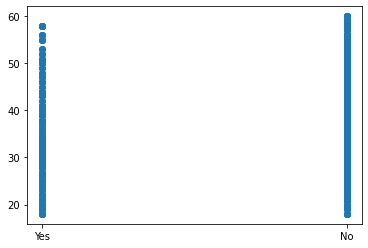

In [57]:
plt.scatter(df['Attrition'],df['Age'])
plt.show()

### Observations:
        Age has no clear influence on employees attrition in this company, employees from all ages had attrited at some point of time.

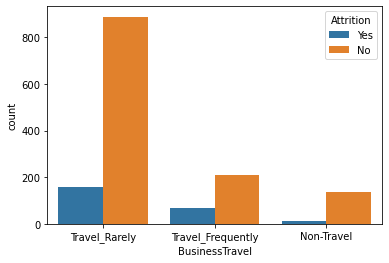

In [58]:
sns.countplot(df['BusinessTravel'],hue=df['Attrition'])
plt.show()

### Observations:
        Non travel employees attrition rate is minimum when compared to other two.

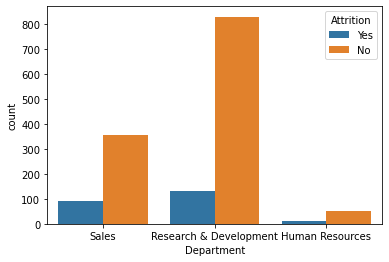

In [59]:
sns.countplot(df['Department'],hue=df['Attrition'])
plt.show()

### Observations:
        Employees attrition rate is higher in Research and Development department.

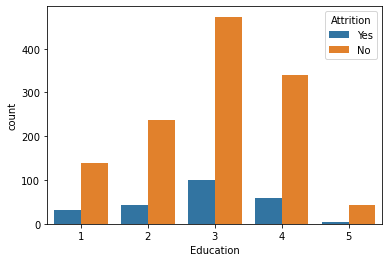

In [60]:
sns.countplot(df['Education'],hue=df['Attrition'])
plt.show()

### Observations:
        Employees attrition rate is higher where employees education level is 2,3,4 on Education scale.

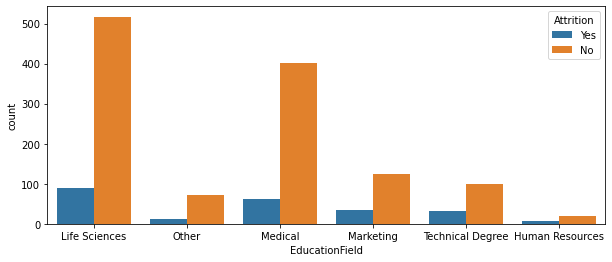

In [61]:
plt.figure(figsize=(10,4))
sns.countplot(df['EducationField'],hue=df['Attrition'])
plt.show()

### Observations:
        Employees attrition rate is higher where employees Education Field is from Life Sciences and Medical.

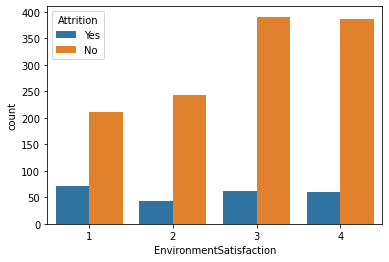

In [62]:
sns.countplot(df['EnvironmentSatisfaction'],hue=df['Attrition'])
plt.show()

### Observations:
        Employees attrition rate is higher where employees Environment Satisfaction is 1 on Environment_Satisfaction scale.

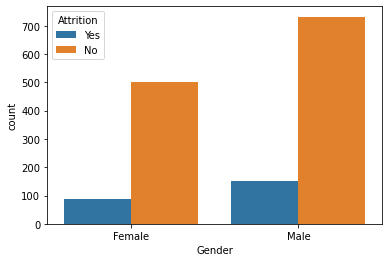

In [63]:
sns.countplot(df['Gender'],hue=df['Attrition'])
plt.show()

### Observations
        Attrition rate among Male employees is higher.

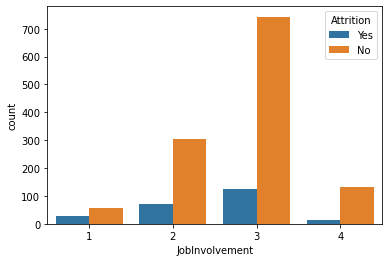

In [64]:
sns.countplot(df['JobInvolvement'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees where their JobInvolvement level is 3 on Job_Involvement scale.

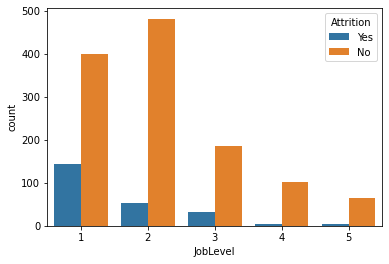

In [65]:
sns.countplot(df['JobLevel'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees where their JobLevel is 1 on JobLevel Scale.

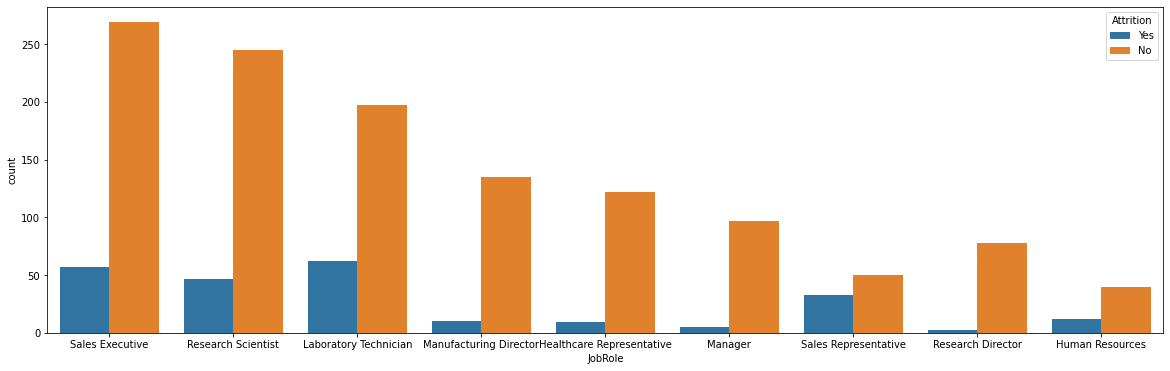

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(df['JobRole'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate among Laboratory Technicians, Sales Executives, Research Scientists, Sales Representatives is higher.

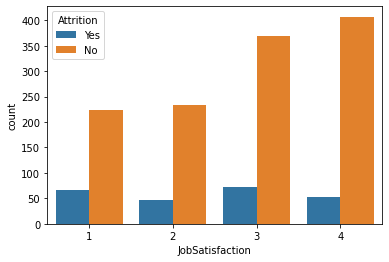

In [67]:
sns.countplot(df['JobSatisfaction'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose JobSatisfaction is 1 on JobSatisfaction scale.

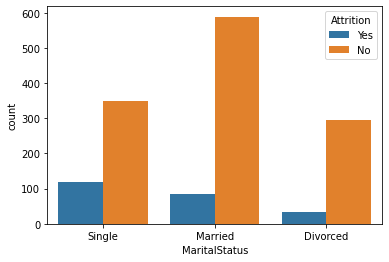

In [68]:
sns.countplot(df['MaritalStatus'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose MaritalStatus is Single.

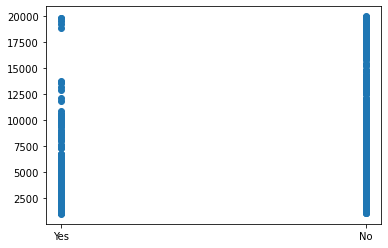

In [69]:
plt.scatter(df['Attrition'],df['MonthlyIncome'])
plt.show()

### Observations:
        -Attrition rate is zero among employess whose MonthlyIncome is in b\w 15000 to 17500 units
        -Attrition rate is higher among employess whose MonthlyIncome is in b\w 2500 to 12500 units.

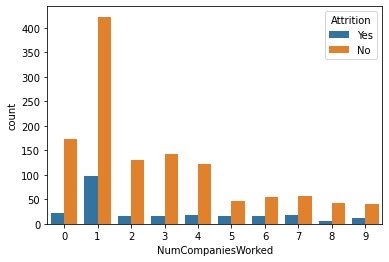

In [70]:
sns.countplot(df['NumCompaniesWorked'],hue=df['Attrition'])
plt.show()

### Observations:
        Employees who have worked only in one company previously have higher chance of being attrited in future.

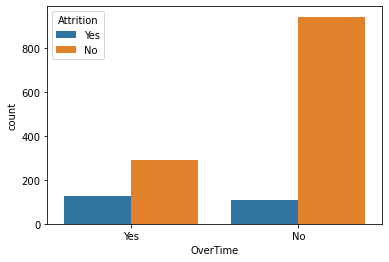

In [71]:
sns.countplot(df['OverTime'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees who work OverTime.

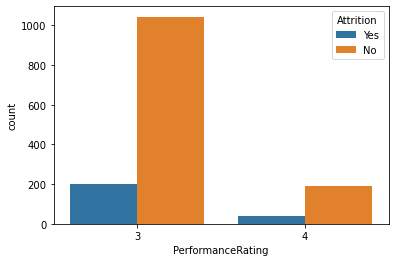

In [72]:
sns.countplot(df['PerformanceRating'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose Performance Rating is 3 on Performance_Rating scale.

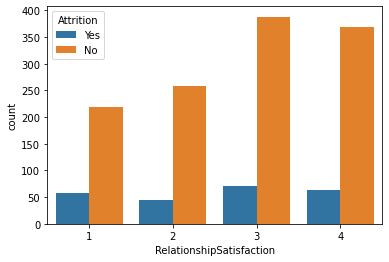

In [73]:
sns.countplot(df['RelationshipSatisfaction'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose Relationship Satisfaction is 3,4 on Relationship_Satisfaction scale.

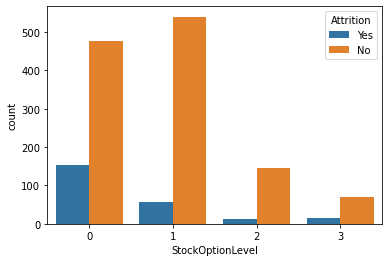

In [74]:
sns.countplot(df['StockOptionLevel'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose StockOptionLevel is 0 on Stock_Option_Level scale.

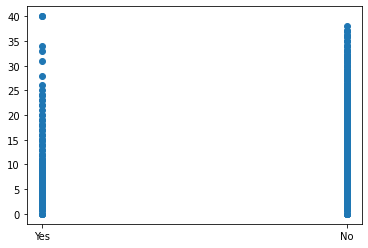

In [75]:
plt.scatter(df['Attrition'],df['TotalWorkingYears'])
plt.show()

### Observations:
    Employees who has less TotalWorkingYears have higher chance of being attrited in future.

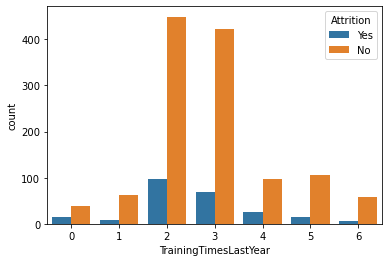

In [76]:
sns.countplot(df['TrainingTimesLastYear'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is higher among employees who have trained 2 to 3 times last year when compared to employees who have trained 5 to 6 times last year.

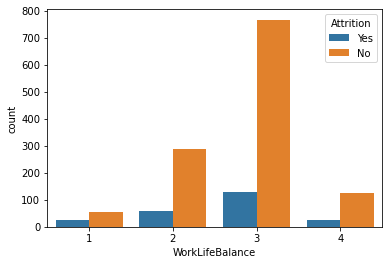

In [77]:
sns.countplot(df['WorkLifeBalance'],hue=df['Attrition'])
plt.show()

### Observations:
        Attrition rate is lower among employees whose WorkLifeBalance is 4 on Work_Life_Balance scale. 

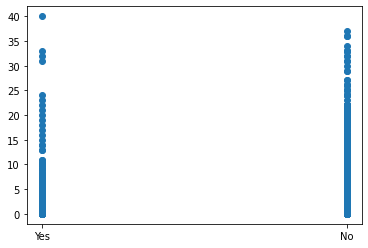

In [78]:
plt.scatter(df['Attrition'],df['YearsAtCompany'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose YearsAtCompany is lower.

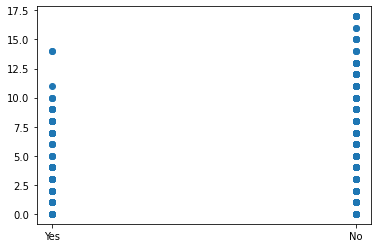

In [81]:
plt.scatter(df['Attrition'],df['YearsWithCurrManager'])
plt.show()

### Observations:
        Attrition rate is higher among employees whose Years With Current Manager is lower.

## Checking Outliers

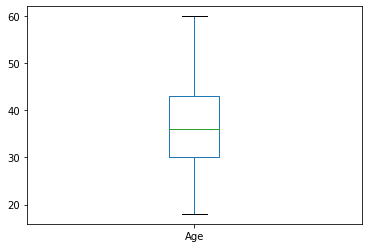

In [82]:
df['Age'].plot.box()

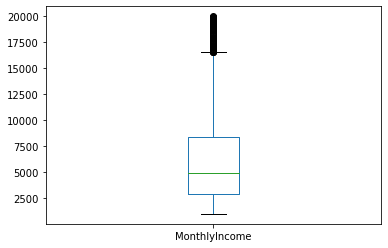

In [83]:
df['MonthlyIncome'].plot.box()

### Observations:
        From above boxplots it is evident that outliers exists.

# Data Preprocessing

## Label Encoding

In [84]:
cols=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
     'OverTime']

In [85]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])

In [86]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


## Removing Outliers

### 1. Z-score Method

In [87]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [88]:
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [89]:
hd = df[(z<3).all(axis=1)]

In [90]:
print(df.shape)
print(hd.shape)

(1470, 31)
(1387, 31)


In [91]:
# percentage loss of data
per_loss=((1470-1387)/1470)*100
per_loss

5.646258503401361

### Observations:
        Since significant amount of data is not lost after removing outliers, we can go ahead.

## Checking Skewness

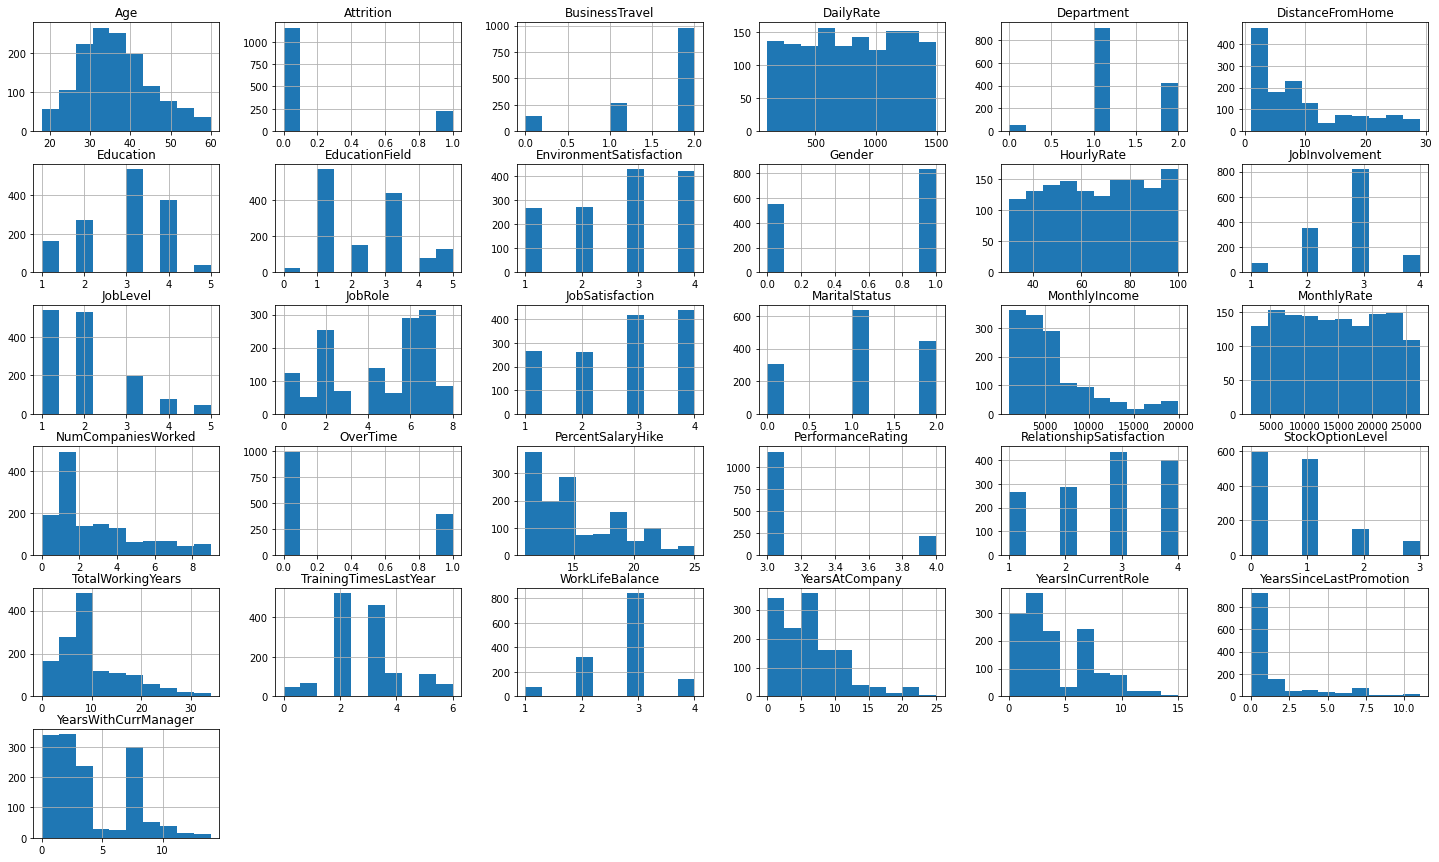

In [92]:
hd.hist(figsize=(25,15))
plt.show()

### Observations:
    From above plots it is evident that skewness exists.

In [93]:
hd.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

### Observations:
        -Acceptable range of skewness is +/- 0.5, hence data is skewed.

## Splitting Data

In [94]:
x=hd.drop('Attrition',axis=1)
y=hd['Attrition']

## Removing Skewness

In [95]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [96]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [98]:
# finding the best random_state

acc=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on {best_random_state}")

 Best Accuracy score is 92.21902017291066 which is found on 431


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=best_random_state)

In [100]:
# finding the best cv

cv=0
for i in range(2,20):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on {best_cv}")

 Best Cross_val_score is 87.74187317494405 which is found on 11


# Finding The Best Model

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [102]:
mod_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

In [103]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference b\w Accuracy score and Cross_val_score is:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

LogisticRegression()
Accuracy score: 92.21902017291066
Cross_val_score: 87.74187317494405
Difference b\w Accuracy score and Cross_val_score is: 4.477146997966614
Training score: 86.15384615384616
[[302   7]
 [ 20  18]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       309
           1       0.72      0.47      0.57        38

    accuracy                           0.92       347
   macro avg       0.83      0.73      0.76       347
weighted avg       0.91      0.92      0.91       347



DecisionTreeClassifier()
Accuracy score: 78.96253602305475
Cross_val_score: 77.57950710706616
Difference b\w Accuracy score and Cross_val_score is: 1.3830289159885893
Training score: 100.0
[[260  49]
 [ 24  14]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       309
           1       0.22      0.37      0.28        38

    accuracy                           0.79       347
   macro avg       0.5

### Observations:
    -From above it is evident that Logistic Regression, SVC, Random Forest Classifier are performing better, with accuracy score of 90%-92%.   

### Let's select Logistic Regression for hyperparameter tuning, because it has higher accuracy score when compared to other two.

In [104]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(lr,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score and Cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',lr.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 92.21902017291066
Cross_val_score: 87.74187317494405
Difference b\w Accuracy score and Cross_val_score is: 4.477146997966614
Training score: 86.15384615384616
[[302   7]
 [ 20  18]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       309
           1       0.72      0.47      0.57        38

    accuracy                           0.92       347
   macro avg       0.83      0.73      0.76       347
weighted avg       0.91      0.92      0.91       347



## Hyper-parameter Tuning

In [105]:
from sklearn.model_selection import GridSearchCV

parameters={
    'penalty':['l1','l2','elasticnet','none'],
    'dual':[True,False],
    'fit_intercept':[True,False],
    }

In [106]:
gscv=GridSearchCV(lr,parameters,scoring='accuracy',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=11, estimator=LogisticRegression(),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [107]:
gscv.best_params_

{'dual': False, 'fit_intercept': True, 'penalty': 'l2'}

In [108]:
lr=LogisticRegression(penalty='l2',dual=False,fit_intercept=True)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(lr,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score and Cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',lr.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 92.21902017291066
Cross_val_score: 87.74187317494405
Difference b\w Accuracy score and Cross_val_score is: 4.477146997966614
Training score: 0.8615384615384616
[[302   7]
 [ 20  18]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       309
           1       0.72      0.47      0.57        38

    accuracy                           0.92       347
   macro avg       0.83      0.73      0.76       347
weighted avg       0.91      0.92      0.91       347



## Roc Curve

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

In [110]:
y_pred_proba=lr.predict_proba(x_test)[:,1]

In [111]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)

Text(0.5, 1.0, 'Logistic Regression')

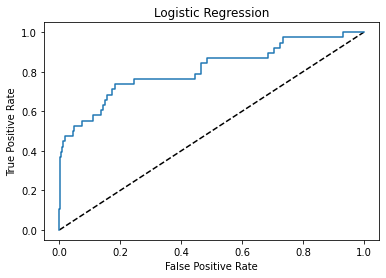

In [112]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')

## Roc-Auc Score

In [113]:
ra_score=roc_auc_score(y_test,y_pred)

In [114]:
ra_score*100

72.5515244421734

# Conclusion

In [115]:
df1=pd.DataFrame({'Actual Attrition':y_test,'Predicted Attrition':y_pred})
df1

,Actual Attrition,Predicted Attrition
322,0,0
478,0,0
1101,0,0
1044,0,0
688,1,1
...,...,...
1114,0,0
530,0,0
414,1,1
1380,0,0


### From above table it is clear that model is performing with 92% accuracy.

In [116]:
import joblib

In [117]:
joblib.dump(y_pred,'Attrition Predicted.csv')

['Attrition Predicted.csv']

In [118]:
# Saving the best model for production.
joblib.dump(lr,'Attrition Model.obj')

['Attrition Model.obj']